### Unsupervised learning: Cluster Analysis using K means

### Loading Libraries 

In [1]:
## Importing packages
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pylab as plt 
import seaborn as sns


### Loading Data

In [2]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving utilities.csv to utilities.csv


In [3]:
# Reading the Dataset
df = pd.read_csv('utilities.csv')

In [4]:
# copy of Df
df1 = df.copy()

In [5]:
# Viewong top rows
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        22 non-null     object 
 1   Fixed_charge   22 non-null     float64
 2   RoR            22 non-null     float64
 3   Cost           22 non-null     int64  
 4   Load_factor    22 non-null     float64
 5   Demand_growth  22 non-null     float64
 6   Sales          22 non-null     int64  
 7   Nuclear        22 non-null     float64
 8   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.7+ KB


In [ ]:
 # Describe function
 df.describe()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000
mean,1.114091,10.736364,168.181818,56.977273,3.240909,8914.045455,12.00000,1.102727
std,0.184511,2.244049,41.191349,4.461148,3.118250,3549.984031,16.79192,0.556098
min,0.750000,6.400000,96.000000,49.800000,-2.200000,3300.000000,0.00000,0.309000
25%,1.042500,9.200000,148.500000,53.775000,1.450000,6458.250000,0.00000,0.630000
50%,1.110000,11.050000,170.500000,56.350000,3.000000,8024.000000,0.00000,0.960000
75%,1.190000,12.350000,195.750000,60.300000,5.350000,10128.250000,24.60000,1.516250
max,1.490000,15.400000,252.000000,67.600000,9.200000,17441.000000,50.20000,2.116000


In [6]:
# Dropping company
df = df.iloc[: , 1:]

In [ ]:
# Df Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fixed_charge   22 non-null     float64
 1   RoR            22 non-null     float64
 2   Cost           22 non-null     int64  
 3   Load_factor    22 non-null     float64
 4   Demand_growth  22 non-null     float64
 5   Sales          22 non-null     int64  
 6   Nuclear        22 non-null     float64
 7   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.5 KB


### K means: Clustering analysis

In [ ]:
# Standardizing the variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled

,0,1,2,3,4,5,6,7
0,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
1,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
2,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
3,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
5,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
6,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
7,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
8,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073
9,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967


In [ ]:
# df with head function 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2,3,4,5,6,7
0,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
1,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
2,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
3,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [ ]:
# Df with columns function
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head(6)

,0,1,2,3,4,5,6,7
0,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
1,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
2,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
3,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
5,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499


In [ ]:
# Create Clusters with K means computing
kmeans = KMeans(n_clusters = 6, random_state = 2)
k_pred = kmeans.fit(df_scaled)
k_pred


KMeans(n_clusters=6, random_state=2)

In [ ]:
# Cluster controls
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
df_clust



,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,0.642979,0.591560,0.136289,1.458287,0.369518,-0.436338,-0.731447,0.676602
1,0.393352,0.758801,-1.176527,-0.533952,-0.801203,0.444577,-0.502869,-0.416385
2,-0.943540,-1.047394,0.194268,0.569619,0.281987,-0.608773,0.013410,1.024590
3,-0.614402,-0.852787,1.370418,-0.491890,1.015056,1.900210,-0.731447,-0.988493
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
5,0.046647,0.587760,0.243965,-0.304520,-0.005222,-0.599143,1.779853,-0.855359


In [ ]:
# Precision
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
pd.set_option('precision', 6)
df_clust

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,0.642979,0.591560,0.136289,1.458287,0.369518,-0.436338,-0.731447,0.676602
1,0.393352,0.758801,-1.176527,-0.533952,-0.801203,0.444577,-0.502869,-0.416385
2,-0.943540,-1.047394,0.194268,0.569619,0.281987,-0.608773,0.013410,1.024590
3,-0.614402,-0.852787,1.370418,-0.491890,1.015056,1.900210,-0.731447,-0.988493
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
5,0.046647,0.587760,0.243965,-0.304520,-0.005222,-0.599143,1.779853,-0.855359


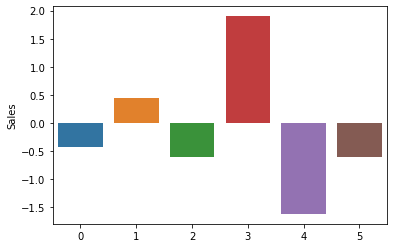

In [ ]:
# Sales
sns.barplot(data = df_clust, x = df_clust.index, y = 'Sales')

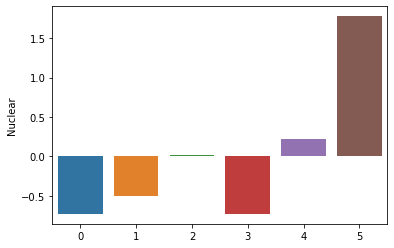

In [ ]:
# Nuclear 
sns.barplot(data = df_clust, x = df_clust.index, y = 'Nuclear')

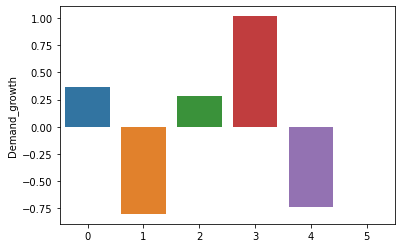

In [ ]:
# Demand_growth
sns.barplot(data = df_clust, x = df_clust.index, y = 'Demand_growth')

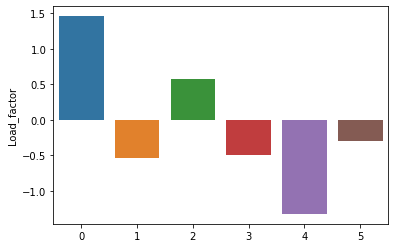

In [ ]:
# Load_factor
sns.barplot(data = df_clust, x = df_clust.index, y = 'Load_factor')

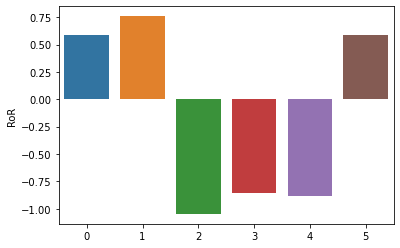

In [ ]:
# RoR
sns.barplot(data = df_clust, x = df_clust.index, y = 'RoR')

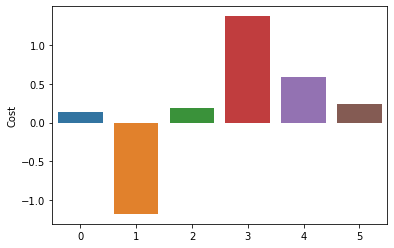

In [ ]:
# Cost
sns.barplot(data = df_clust, x = df_clust.index, y = 'Cost')

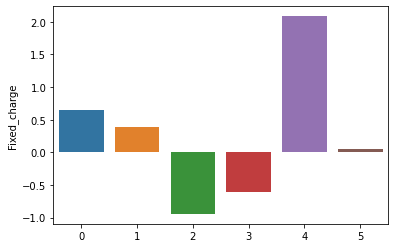

In [ ]:
# Fixed_charge
sns.barplot(data = df_clust, x = df_clust.index, y = 'Fixed_charge')

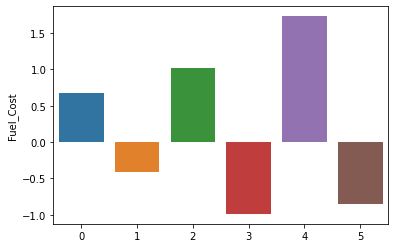

In [ ]:
# Fuel_Cost
sns.barplot(data = df_clust, x = df_clust.index, y = 'Fuel_Cost')

### Choosing K Elbow method

In [ ]:
# Computing inertia
distortions = []
K = range(2,10)
for i in K:
  km = KMeans(n_clusters = i)
  km.fit(df_scaled)
  distortions.append(km.inertia_)

In [ ]:
distortions

[137.4498225313212,
 106.55401965419406,
 84.21096768855101,
 72.92710374350438,
 62.90206304463571,
 55.71688197240292,
 47.05799990228401,
 37.79839810771665]

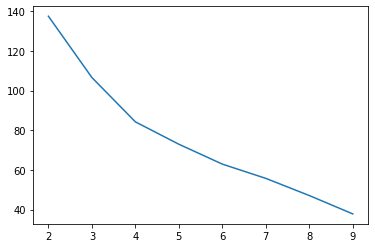

In [ ]:
#plot inertia
plt.plot(K, distortions)

In [ ]:
print(distortions)

[137.4498225313212, 106.55401965419406, 84.21096768855101, 72.92710374350438, 62.90206304463571, 55.71688197240292, 47.05799990228401, 37.79839810771665]


In [ ]:
 # Create Clusters with K means computing
kmeans = KMeans(n_clusters = 5, random_state = 2)
k_pred = kmeans.fit(df_scaled)
k_pred

KMeans(n_clusters=5, random_state=2)